# Red Wine Draft 1

# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import datetime
import sqlite3

from IPython.display import display
from pylab import rcParams

# Display Parameters

## Display Features

In [2]:
%matplotlib inline
pd.options.display.max_rows = 300000
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 500
pd.set_option("display.float_format", lambda x: "%.3f" % x)

## Colors

In [3]:
color_1 = "bisque"
color_2 = "crimson"
color_3 = "orangered"
color_4 = "lightcoral"
color_5 = "royalblue"
color_6 = "pink"
color_7 = "indianred"
color_8 = "slategrey"
color_9 = "salmon"

## Figure Parameters

In [4]:
size = 20

params = {
    "font.family": "Times New Roman",
    "font.size": size,
    "axes.labelsize": size,
    "xtick.labelsize": size * 0.75,
    "ytick.labelsize": size * 0.75,
    "figure.titlesize": size * 1.5,
    "axes.titlesize": size * 1.5,
    "axes.titlepad": size,
    "axes.labelpad": size - 10,
    "lines.linewidth": 2,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.spines.left": False,
    "axes.spines.bottom": False,
    "legend.fontsize": size,
}

# Goal

Determine which physiochemical properties make a wine "good."

# Load Raw Data

In [5]:
redwine = pd.read_csv(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\RedWine\\DataSets\\winequality-red.csv",
    index_col=False,
)

In [6]:
redwine.shape

(1599, 12)

In [7]:
redwine.sort_values('quality', ascending = False).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
495,10.700,0.350,0.530,2.600,0.070,5.000,16.000,0.997,3.150,0.650,11.000,8
1403,7.200,0.330,0.330,1.700,0.061,3.000,13.000,0.996,3.230,1.100,10.000,8
390,5.600,0.850,0.050,1.400,0.045,12.000,88.000,0.992,3.560,0.820,12.900,8
1061,9.100,0.400,0.500,1.800,0.071,7.000,16.000,0.995,3.210,0.690,12.500,8
1202,8.600,0.420,0.390,1.800,0.068,6.000,12.000,0.995,3.350,0.690,11.700,8


In [8]:
redwine.sort_values('quality', ascending = False).tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
690,7.400,1.185,0.000,4.250,0.097,5.000,14.000,0.997,3.630,0.540,10.700,3
1478,7.100,0.875,0.050,5.700,0.082,3.000,14.000,0.998,3.400,0.520,10.200,3
899,8.300,1.020,0.020,3.400,0.084,6.000,11.000,0.999,3.480,0.490,11.000,3
1299,7.600,1.580,0.000,2.100,0.137,5.000,9.000,0.995,3.500,0.400,10.900,3
832,10.400,0.440,0.420,1.500,0.145,34.000,48.000,0.998,3.380,0.860,9.900,3


In [9]:
redwine['quality'].nunique()

6

In [10]:
redwine['fixed acidity'].nunique()

96

In [11]:
redwine['volatile acidity'].nunique()

143

In [12]:
redwine['citric acid'].nunique()

80

In [13]:
redwine['residual sugar'].nunique()

91

In [14]:
redwine['pH'].nunique()

89

In [15]:
redwine.groupby(['quality']).size()

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

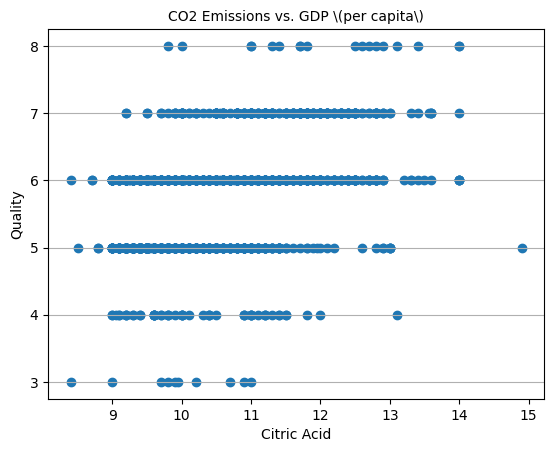

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt


fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('CO2 Emissions vs. GDP \(per capita\)',fontsize=10)
axis.set_xlabel('Citric Acid', fontsize=10)
axis.set_ylabel('Quality', fontsize=10)

X = redwine['alcohol']
Y = redwine['quality']

axis.scatter(X, Y)
plt.show()

In [17]:
eight = redwine[redwine["quality"] == 8]

In [18]:
eight

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
267,7.900,0.350,0.460,3.600,0.078,15.000,37.000,0.997,3.350,0.860,12.800,8
278,10.300,0.320,0.450,6.400,0.073,5.000,13.000,0.998,3.230,0.820,12.600,8
390,5.600,0.850,0.050,1.400,0.045,12.000,88.000,0.992,3.560,0.820,12.900,8
440,12.600,0.310,0.720,2.200,0.072,6.000,29.000,0.999,2.880,0.820,9.800,8
455,11.300,0.620,0.670,5.200,0.086,6.000,19.000,0.999,3.220,0.690,13.400,8
481,9.400,0.300,0.560,2.800,0.080,6.000,17.000,0.996,3.150,0.920,11.700,8
495,10.700,0.350,0.530,2.600,0.070,5.000,16.000,0.997,3.150,0.650,11.000,8
498,10.700,0.350,0.530,2.600,0.070,5.000,16.000,0.997,3.150,0.650,11.000,8
588,5.000,0.420,0.240,2.000,0.060,19.000,50.000,0.992,3.720,0.740,14.000,8
828,7.800,0.570,0.090,2.300,0.065,34.000,45.000,0.994,3.460,0.740,12.700,8


In [19]:
eight.shape

(18, 12)

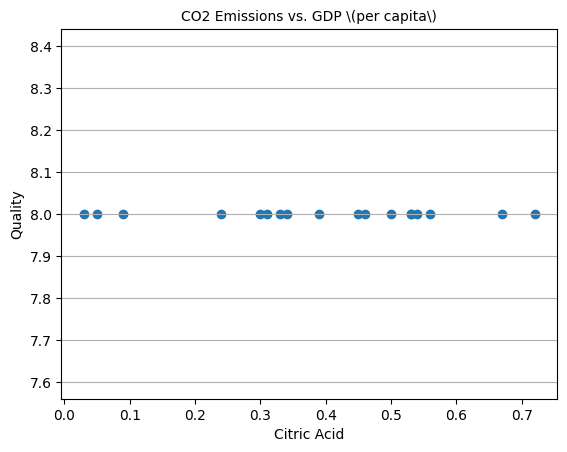

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt


fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('CO2 Emissions vs. GDP \(per capita\)',fontsize=10)
axis.set_xlabel('Citric Acid', fontsize=10)
axis.set_ylabel('Quality', fontsize=10)

X = eight['citric acid']
Y = eight['quality']

axis.scatter(X, Y)
plt.show()

In [21]:
eight['pH'].nunique()

13

In [22]:
eight['citric acid'].nunique()

17

In [23]:
eight['fixed acidity'].nunique()

15

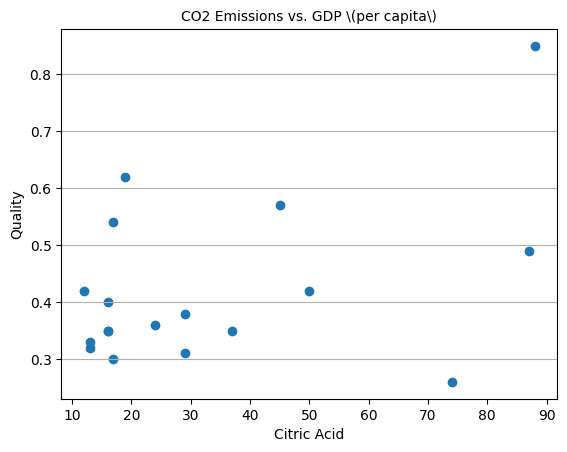

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt


fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('CO2 Emissions vs. GDP \(per capita\)',fontsize=10)
axis.set_xlabel('Citric Acid', fontsize=10)
axis.set_ylabel('Quality', fontsize=10)

X = eight['total sulfur dioxide']
Y = eight['volatile acidity']

axis.scatter(X, Y)
plt.show()

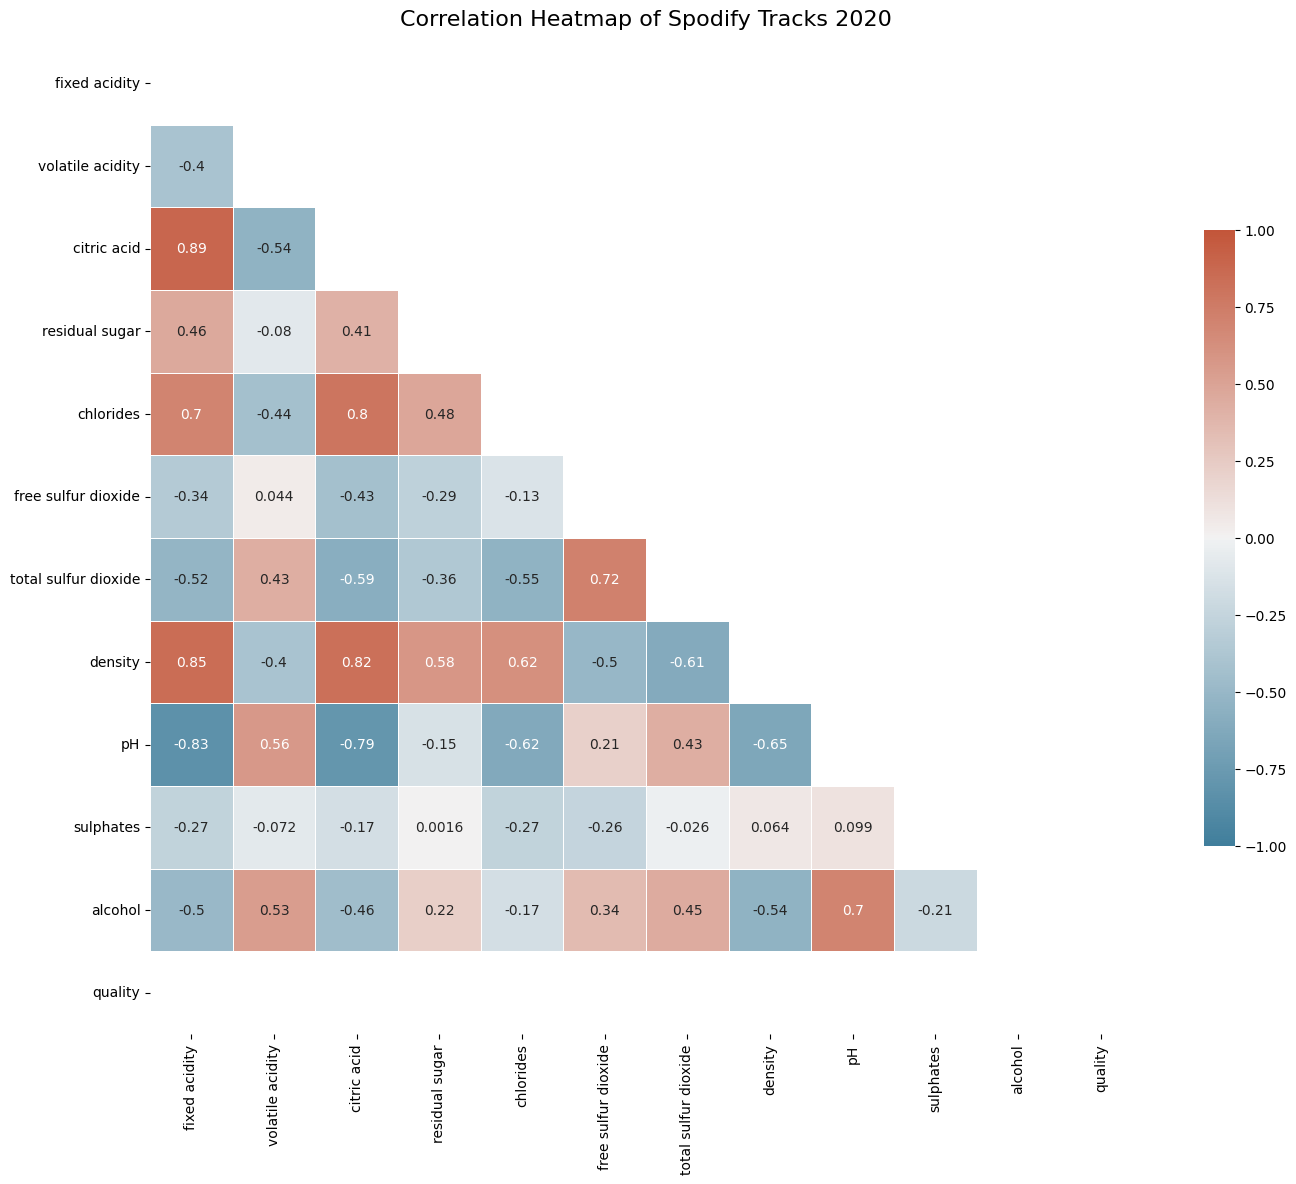

In [25]:
corr = eight.corr()

mask = np.triu(np.ones_like(corr, dtype = bool))

f, ax = plt.subplots(figsize = (16, 16))

cmap = sns.diverging_palette(230, 20, as_cmap = True)
heatmap = sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=1,
    vmin=-1,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True,
)

heatmap.set_title(
    "Correlation Heatmap of Spodify Tracks 2020",
    fontdict={"fontsize": 16},
    pad=12,
)
plt.xlabel("")
plt.ylabel("");

In [26]:
eight_2 = eight.drop('quality', axis=1)

In [27]:
eight_2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
267,7.900,0.350,0.460,3.600,0.078,15.000,37.000,0.997,3.350,0.860,12.800
278,10.300,0.320,0.450,6.400,0.073,5.000,13.000,0.998,3.230,0.820,12.600
390,5.600,0.850,0.050,1.400,0.045,12.000,88.000,0.992,3.560,0.820,12.900
440,12.600,0.310,0.720,2.200,0.072,6.000,29.000,0.999,2.880,0.820,9.800
455,11.300,0.620,0.670,5.200,0.086,6.000,19.000,0.999,3.220,0.690,13.400


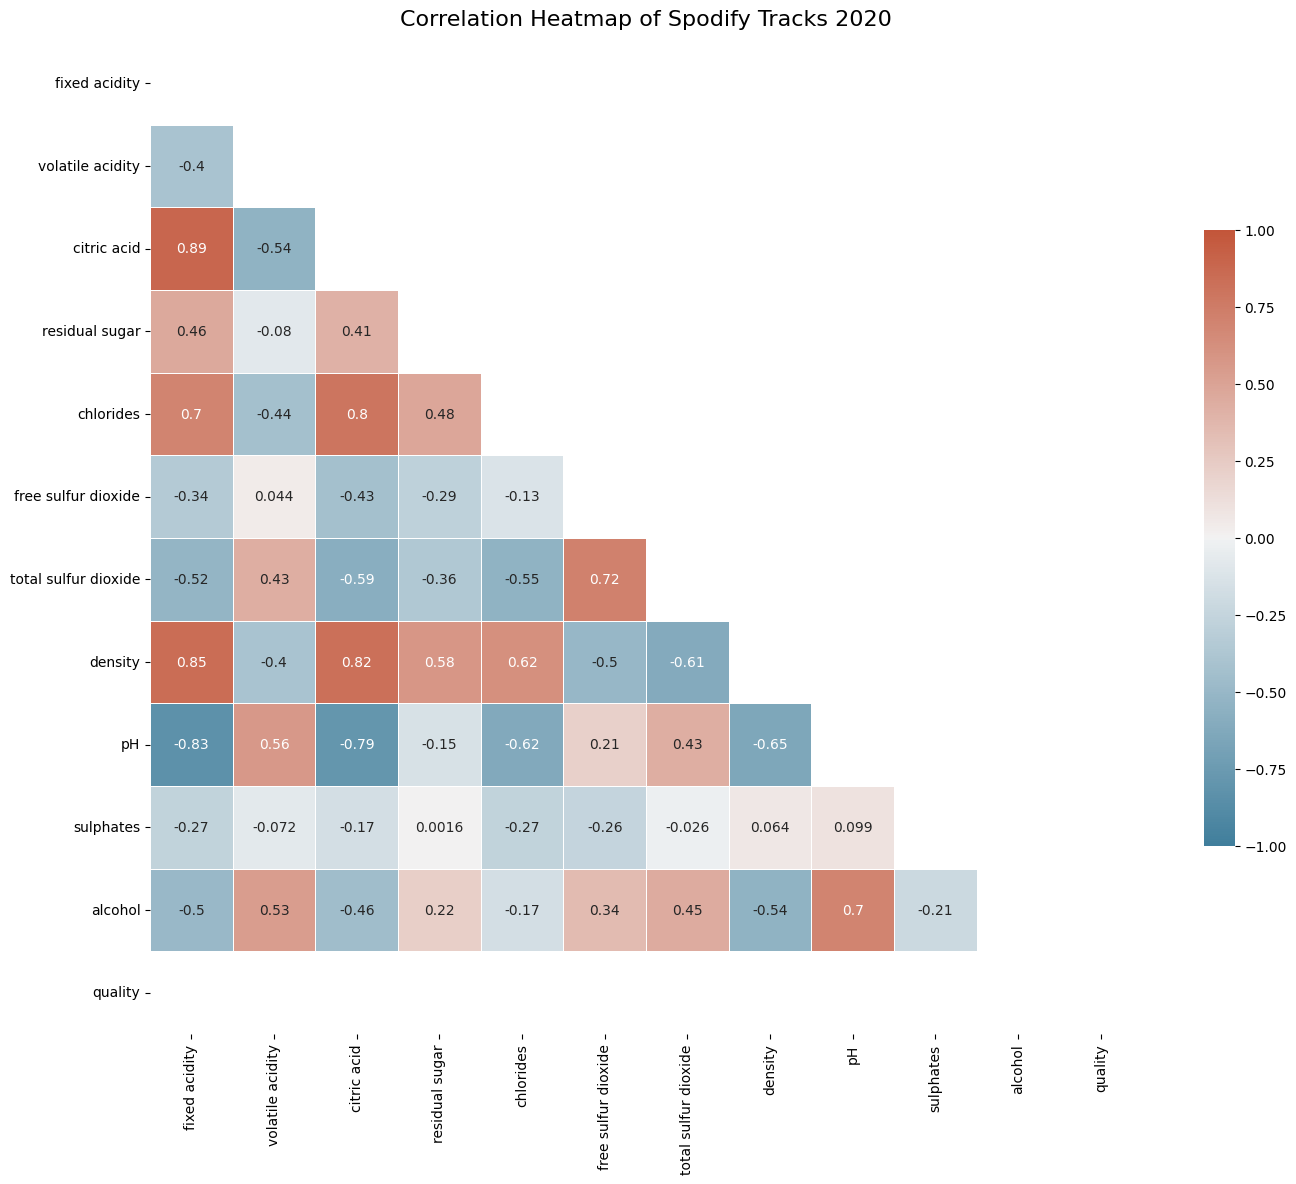

In [28]:
corr = eight.corr()

mask = np.triu(np.ones_like(corr, dtype = bool))

f, ax = plt.subplots(figsize = (16, 16))

cmap = sns.diverging_palette(230, 20, as_cmap = True)
heatmap = sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=1,
    vmin=-1,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True,
)

heatmap.set_title(
    "Correlation Heatmap of Spodify Tracks 2020",
    fontdict={"fontsize": 16},
    pad=12,
)
plt.xlabel("")
plt.ylabel("");

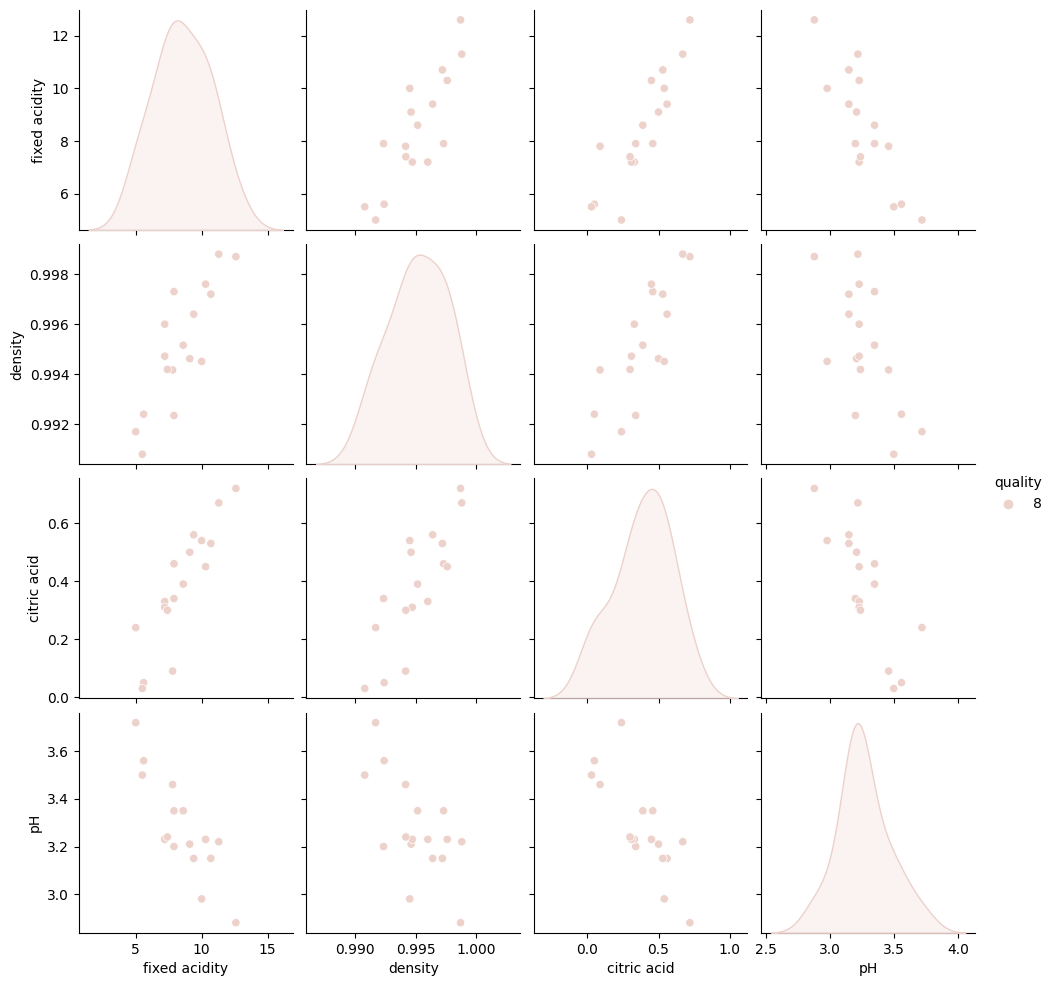

In [38]:
df=eight[['fixed acidity','density','citric acid','pH', 'quality']]
sns.pairplot(df, hue='quality')
plt.show()

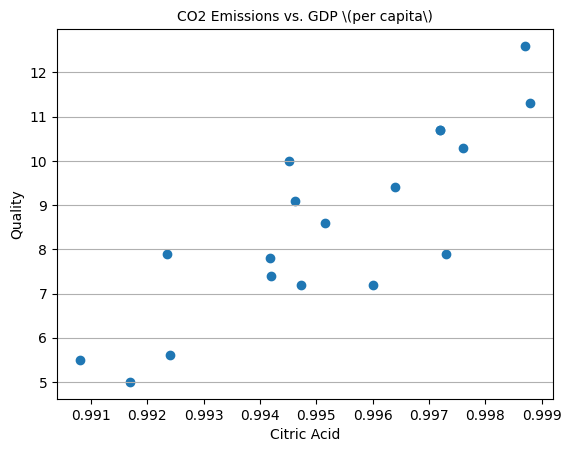

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt


fig, axis = plt.subplots()

axis.yaxis.grid(True)
axis.set_title('CO2 Emissions vs. GDP \(per capita\)',fontsize=10)
axis.set_xlabel('Citric Acid', fontsize=10)
axis.set_ylabel('Quality', fontsize=10)

X = eight['density']
Y = eight['fixed acidity']

axis.scatter(X, Y)
plt.show()

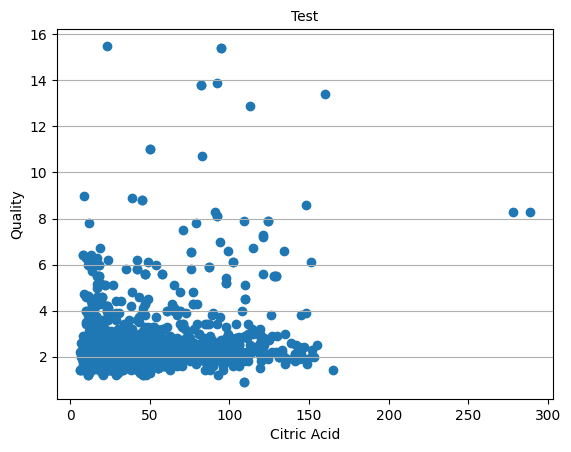

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt


fig, axis = plt.subplots()

axis.yaxis.grid(True)
axis.set_title('Test',fontsize=10)
axis.set_xlabel('Citric Acid', fontsize=10)
axis.set_ylabel('Quality', fontsize=10)

X = redwine['total sulfur dioxide']
Y = redwine['residual sugar']

axis.scatter(X, Y)
plt.show()

In [31]:
corr = eight.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000,-0.402,0.886,0.462,0.702,-0.337,-0.516,0.848,-0.832,-0.269,-0.497,NaN
volatile acidity,-0.402,1.000,-0.541,-0.080,-0.436,0.044,0.434,-0.402,0.563,-0.072,0.533,NaN
citric acid,0.886,-0.541,1.000,0.408,0.796,-0.430,-0.586,0.824,-0.790,-0.169,-0.460,NaN
residual sugar,0.462,-0.080,0.408,1.000,0.483,-0.287,-0.361,0.580,-0.148,0.002,0.225,NaN
chlorides,0.702,-0.436,0.796,0.483,1.000,-0.132,-0.546,0.624,-0.618,-0.267,-0.171,NaN
free sulfur dioxide,-0.337,0.044,-0.430,-0.287,-0.132,1.000,0.717,-0.501,0.214,-0.256,0.344,NaN
total sulfur dioxide,-0.516,0.434,-0.586,-0.361,-0.546,0.717,1.000,-0.614,0.432,-0.026,0.451,NaN
density,0.848,-0.402,0.824,0.580,0.624,-0.501,-0.614,1.000,-0.646,0.064,-0.543,NaN
pH,-0.832,0.563,-0.790,-0.148,-0.618,0.214,0.432,-0.646,1.000,0.099,0.698,NaN
sulphates,-0.269,-0.072,-0.169,0.002,-0.267,-0.256,-0.026,0.064,0.099,1.000,-0.213,NaN


In [32]:
eight.corrwith(eight['quality'])

C:\Users\Space\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Space\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


fixed acidity          NaN
volatile acidity       NaN
citric acid            NaN
residual sugar         NaN
chlorides              NaN
free sulfur dioxide    NaN
total sulfur dioxide   NaN
density                NaN
pH                     NaN
sulphates              NaN
alcohol                NaN
quality                NaN
dtype: float64

In [33]:
eight.corr().iloc[:-1,-1]

fixed acidity          NaN
volatile acidity       NaN
citric acid            NaN
residual sugar         NaN
chlorides              NaN
free sulfur dioxide    NaN
total sulfur dioxide   NaN
density                NaN
pH                     NaN
sulphates              NaN
alcohol                NaN
Name: quality, dtype: float64